# **Facebook Stock anaysis based on Simple Moving Average Crossover Strategy**


## **Project Statement:**
### Mark the Long and Short position for the Facebook Stock based on historical data of the stock of the past 3 years from yahoo finance using simple moving average crossover strategy for the positions.

### **Set up enviornment**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### **Import the data from the Yahoo Finance site**
> ### We have taken last three financial years of data of Google stocks for analysis.

In [0]:
fb = data.DataReader('FB', 'yahoo',start='03/31/2016', end='03/31/2019')

### **Galance at the Data**

In [481]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-31,115.010002,113.769997,114.699997,114.099998,21207500,114.099998
2016-04-01,116.169998,113.349998,113.750000,116.059998,24760500,116.059998
2016-04-04,114.550003,111.610001,114.070000,112.550003,48487900,112.550003
2016-04-05,113.320000,111.900002,112.110001,112.220001,22962400,112.220001
2016-04-06,113.809998,112.419998,112.470001,113.709999,20814600,113.709999


In [482]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2016-03-31 to 2019-03-29
Data columns (total 6 columns):
High         755 non-null float64
Low          755 non-null float64
Open         755 non-null float64
Close        755 non-null float64
Volume       755 non-null int64
Adj Close    755 non-null float64
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [483]:
fb.describe()

,High,Low,Open,Close,Volume,Adj Close
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000
mean,154.009788,151.050278,152.540477,152.611576,2.202241e+07,152.611576
std,25.474969,24.960082,25.196377,25.266262,1.441302e+07,25.266262
min,108.940002,106.309998,107.940002,108.760002,8.190300e+06,108.760002
25%,129.940002,128.139999,129.084999,129.020004,1.420605e+07,129.020004
50%,154.080002,151.089996,152.699997,152.779999,1.830650e+07,152.779999
75%,174.850006,171.439995,173.089996,172.785004,2.422760e+07,172.785004
max,218.619995,214.270004,215.720001,217.500000,1.698037e+08,217.500000


### **Visualization of opening and closing of stock price.**

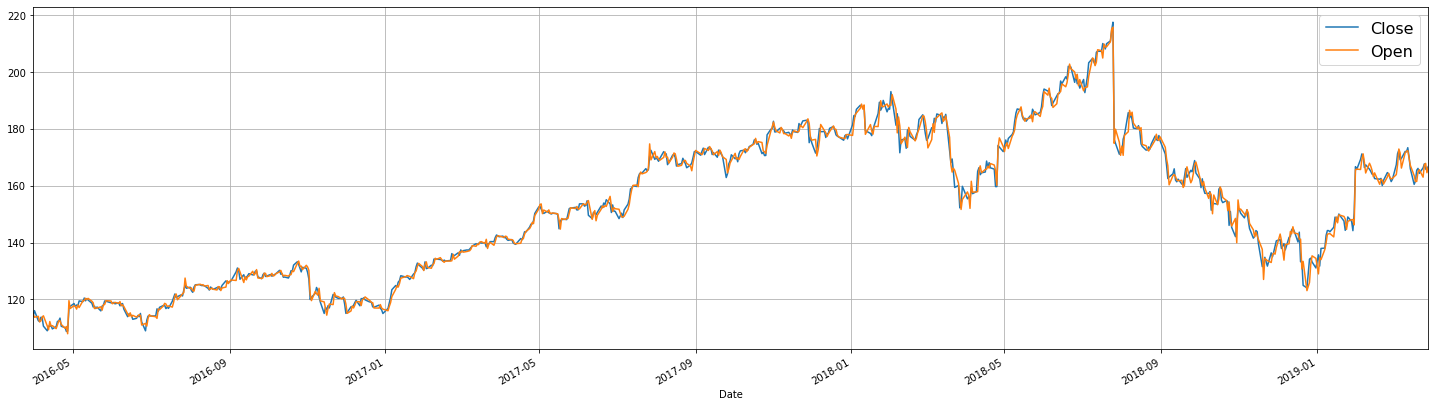

In [484]:
fb[['Close','Open']].plot(grid=True,figsize=(25,7))
plt.legend(prop={'size':16})

### **Taking the rolling means with 5 days and 30 days means.**

In [0]:
fb['5days'] = np.round(fb['Close'].rolling(window=5).mean(),2)
fb['30days'] = np.round(fb['Close'].rolling(window=30).mean(),2)

### **Ploting the moving average**

Text(0, 0.5, 'Stock Price')

Text(0.5, 0, 'Date')

Text(0.5, 0.98, 'Moving Averages and Close values for Facebook')

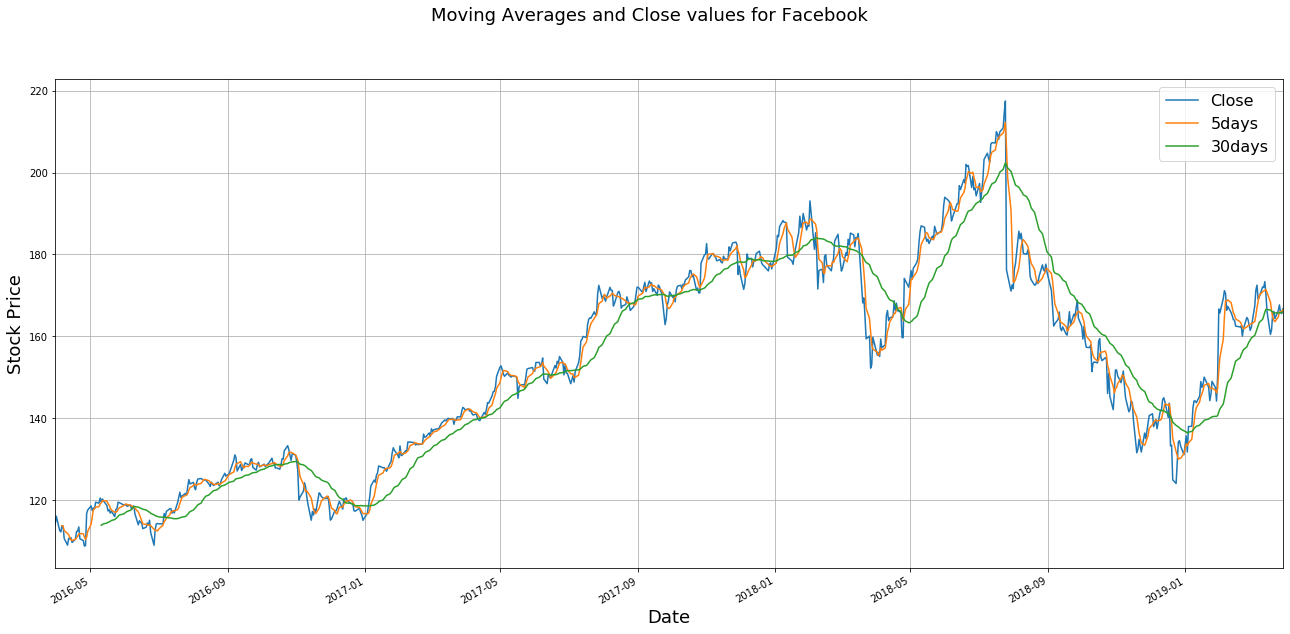

In [486]:
fb[['Close','5days','30days']].plot(grid=True,figsize=(22,10))
plt.legend(prop={'size':16})
plt.ylabel('Stock Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.suptitle('Moving Averages and Close values for Facebook',fontsize=18)

In [487]:
fb['5days'].head()

Date
2016-03-31       NaN
2016-04-01       NaN
2016-04-04       NaN
2016-04-05       NaN
2016-04-06    113.73
Name: 5days, dtype: float64

In [488]:
fb['30days'].head()

Date
2016-03-31   NaN
2016-04-01   NaN
2016-04-04   NaN
2016-04-05   NaN
2016-04-06   NaN
Name: 30days, dtype: float64

In [489]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close,5days,30days
Date,,,,,,,,
2016-03-31,115.010002,113.769997,114.699997,114.099998,21207500,114.099998,NaN,NaN
2016-04-01,116.169998,113.349998,113.750000,116.059998,24760500,116.059998,NaN,NaN
2016-04-04,114.550003,111.610001,114.070000,112.550003,48487900,112.550003,NaN,NaN
2016-04-05,113.320000,111.900002,112.110001,112.220001,22962400,112.220001,NaN,NaN
2016-04-06,113.809998,112.419998,112.470001,113.709999,20814600,113.709999,113.73,NaN


In [490]:
fb['5days'].shape

(755,)

In [491]:
fb['5days'].value_counts().sum()

751

In [492]:
fb['30days'].value_counts().sum()


726

### **Criteria for a long and short position.**

*   Take the Long position when the 5 days moving average is more than 30 days 
moving average with certain points.
*   Take the Short position when the 5 days moving average is less than 30 days 
moving average with certain points.

### **Assumption of value**

*   I have selected the number of points(X) as 5 for taking a short or long position, where the X is the difference between simple moving average of 5 days and 30 days.
*   I have seen that from the data taking the mean of highs and lows into consideration whenever there is a rise of 5 points there is a good probability for taking position.



 






In [0]:
fb['5-30_days'] = fb['5days'] - fb['30days']

### **Position are represented by numbers as:**


*   Short Position is represented by '-1'.
*   Long  Position is represented by '1'.



In [494]:
X = 5
fb['Stance'] = np.where(fb['5-30_days'] > X, 1, 0)
fb['Stance'] = np.where(fb['5-30_days'] < -X, -1, fb['Stance'])
fb['Stance'].value_counts()

 0    473
 1    171
-1    111
Name: Stance, dtype: int64

### **Vizualization of Position**

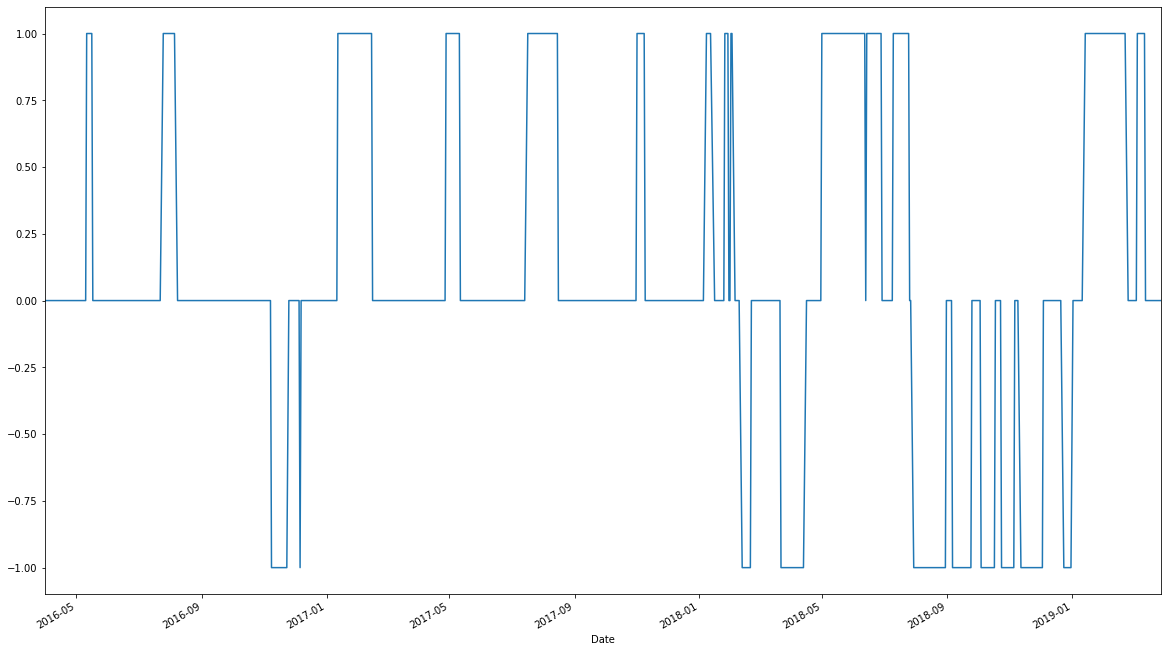

In [495]:
fb['Stance'].plot(lw=1.5,ylim=[-1.1,1.1], figsize = (20,12))

### **Number of Positions**

*   For Short - 111
*   For Long - 171



In [496]:
fb['Position'] = np.where(fb['Stance'] == 1, 'LONG',0) 
fb['Position'] = np.where(fb['Stance'] == -1,'SHORT',fb['Position'])
fb['Position'] = np.where(fb['Stance'] == 0, 'NO POsition',fb['Position'])
fb['Position'].value_counts()

NO POsition    473
LONG           171
SHORT          111
Name: Position, dtype: int64

In [497]:
fb.tail()

,High,Low,Open,Close,Volume,Adj Close,5days,30days,5-30_days,Stance,Position
Date,,,,,,,,,,,
2019-03-25,166.539993,162.000000,163.000000,166.289993,12631200,166.289993,164.74,165.70,-0.96,0,NO POsition
2019-03-26,169.449997,166.350006,167.350006,167.679993,15437900,167.679993,165.97,165.76,0.21,0,NO POsition
2019-03-27,168.940002,164.789993,167.850006,165.869995,10620300,165.869995,166.05,165.79,0.26,0,NO POsition
2019-03-28,166.720001,163.330002,164.570007,165.550003,10443000,165.550003,165.95,165.84,0.11,0,NO POsition
2019-03-29,167.190002,164.809998,166.389999,166.690002,13455500,166.690002,166.42,165.93,0.49,0,NO POsition


In [0]:
fb_map = fb[fb.Stance != 0]
fb_map = fb_map[['High','Low','Open','Close','Volume','Position']]

Text(0, 0.5, 'Stock Price')

Text(0.5, 0, 'Date')

Text(0.5, 0.98, 'Moving Averages and Close value of Facebook')

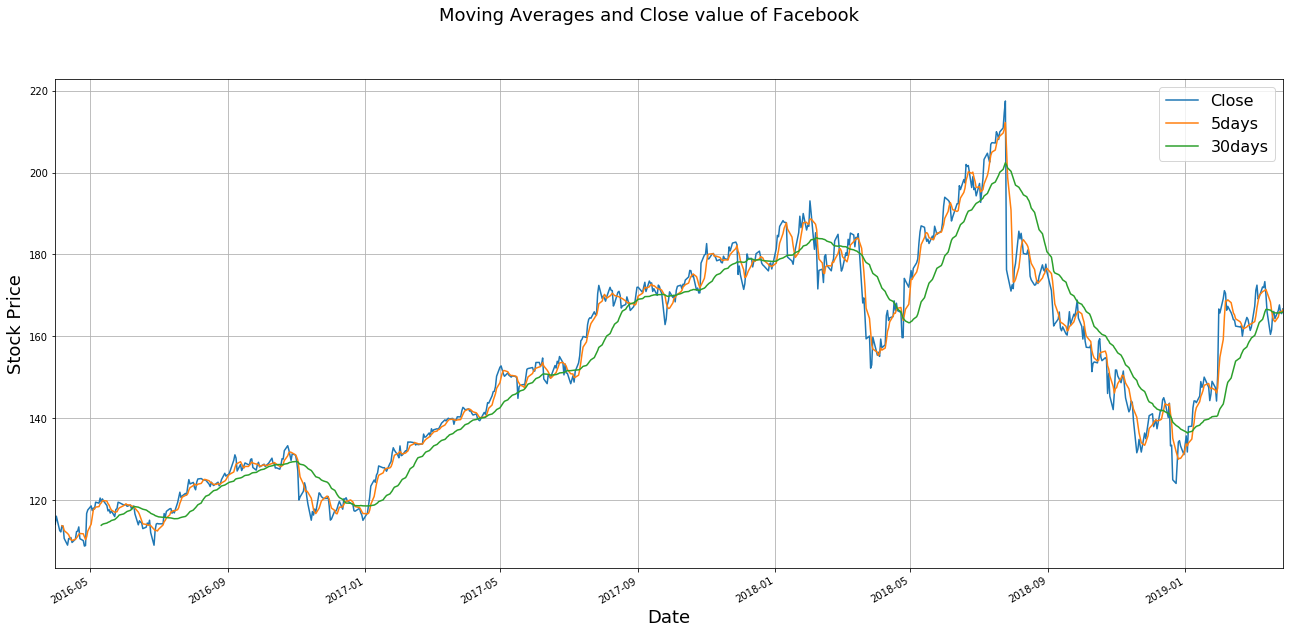

In [499]:
fb[['Close','5days','30days']].plot(grid=True,figsize=(22,10))
plt.legend(prop={'size':16})
plt.ylabel('Stock Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.suptitle('Moving Averages and Close values of Facebook',fontsize=18)

## **Final Position Table** 

In [500]:
fb_map.tail()

,High,Low,Open,Close,Volume,Position
Date,,,,,,
2019-03-07,171.740005,167.610001,171.500000,169.130005,18306500,LONG
2019-03-08,169.619995,165.970001,166.199997,169.600006,13184800,LONG
2019-03-11,174.300003,171.580002,171.600006,172.070007,18884000,LONG
2019-03-12,173.800003,171.220001,172.089996,171.919998,12155300,LONG
2019-03-13,174.029999,172.119995,172.320007,173.369995,11973300,LONG


### **Plotting the Short and Long Postion with moving average.**

Text(0, 0.5, 'Stock Price')

Text(0.5, 0, 'Date')

Text(0.5, 0.98, 'Position Plot with Moving Average of Facebook')

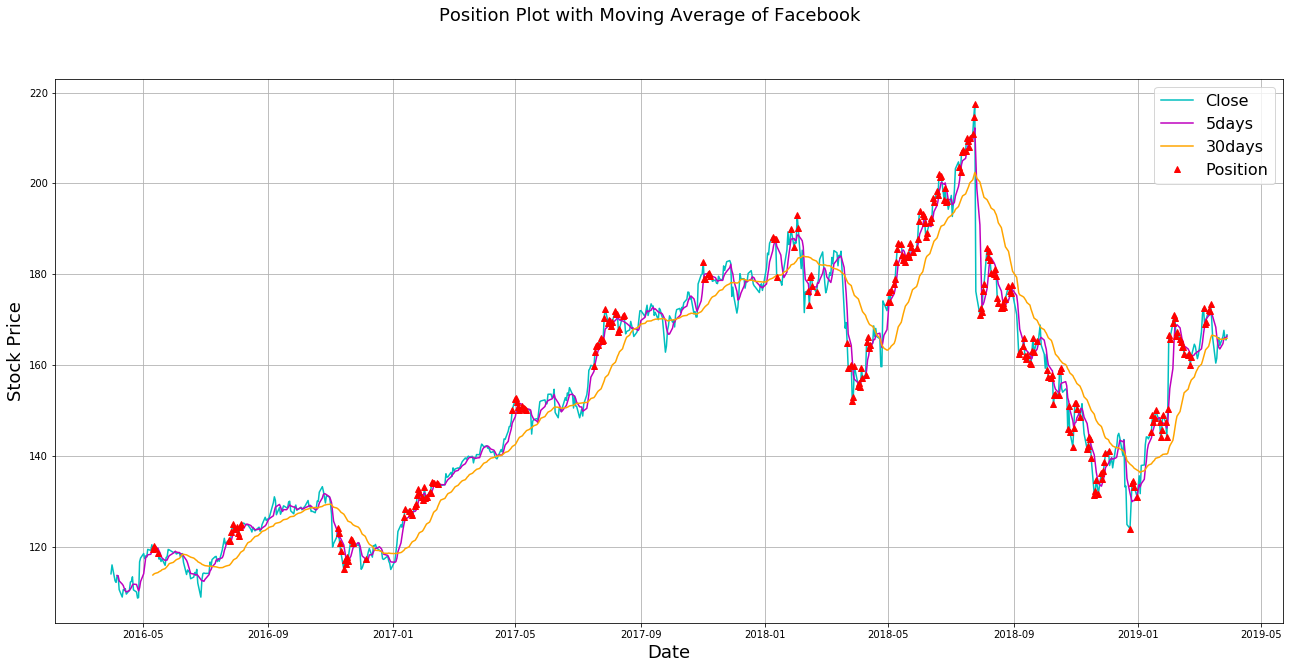

In [501]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot(fb['Close'], '-',color='c',label='Close')
ax.plot(fb['5days'], '-',color='m',label='5days')
ax.plot(fb['30days'], '-',color='orange',label='30days')
ax.plot(fb_map['Close'],'^', color = 'r',label='Position')
plt.ylabel('Stock Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.suptitle('Position Plot with Moving Average of Facebook',fontsize=18)
ax.grid()
ax.legend(loc="upper right")
plt.legend(prop={'size':16})

### **Note:**  Trying various values of X in a loop getting the better X value.

for X in range(0,20,4):
* fb['Stance'] = np.where(fb['5-30_days'] > X, 1, 0)
* fb['Stance'] = np.where(fb['5-30_days'] < X, -1, fb['Stance'])
* fb['Stance'].value_counts()
* fb['Stance'].plot(lw=1.5,ylim=[-1.1,1.1], figsize = (20,12))



